In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def find_redshift_diffs(file_name):
    """
    Stuff
    """
    opened = False
    plus1 = []
    plus2 = []
    lines = []
    try:
        f = open(file_name)
        opened = True
        first = f.readline().split()
        z_i = first.index('Z')
        plate_i = first.index('PLATE')
        fiber_i = first.index('FIBER')
    except:
        print('FAILED')
    else:
        for line in f:
            lines.append(line.split())
        for i in range(len(lines)-1):
            if lines[i][plate_i] == lines[i+1][plate_i]:
                if int(lines[i][fiber_i]) == int(lines[i+1][fiber_i])-1:
                    diff = float(lines[i][z_i]) - float(lines[i+1][z_i])
                    plus1.append(diff)
                elif int(lines[i][fiber_i]) == int(lines[i+1][fiber_i])-2:
                    diff = float(lines[i][z_i]) - float(lines[i+1][z_i])
                    plus2.append(diff)
        for i in range(len(lines)-2):
            if lines[i][plate_i] == lines[i+2][plate_i]:
                if int(lines[i][fiber_i]) == int(lines[i+2][fiber_i])-2:
                    diff = float(lines[i][z_i]) - float(lines[i+2][z_i])
                    plus2.append(diff)
    finally:
        if opened:
            f.close()
    plus1 = np.array(plus1)
    plus2 = np.array(plus2)
    return plus1, plus2

In [5]:
sep1 = np.array([])
sep2 = np.array([])

In [3]:
info0_1, info0_2 = find_redshift_diffs('mjd0.dat')

<function matplotlib.pyplot.show>

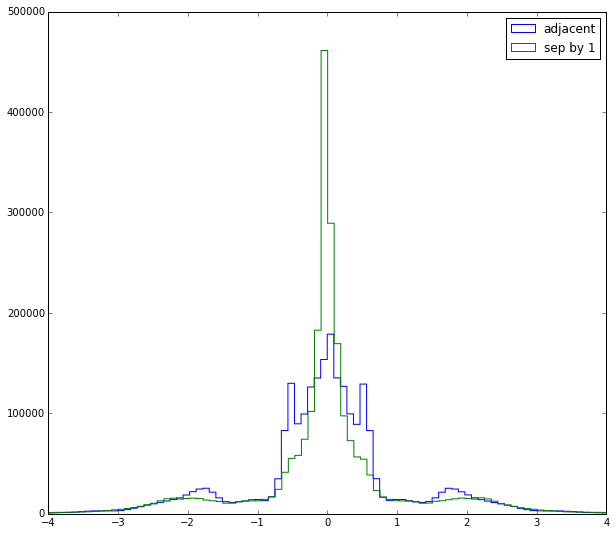

In [14]:
plt.figure(figsize = (10,9))
plt.hist(info0_1, histtype = 'step', bins = 150, label = 'adjacent')
plt.hist(info0_2, histtype = 'step', bins = 150, label = 'sep by 1')
plt.axis([-4,4,0,500000])
plt.legend()
plt.savefig('Z_all.png')
plt.show

In [7]:
info1_1, info1_2 = find_redshift_diffs('mjd1.dat')

<function matplotlib.pyplot.show>

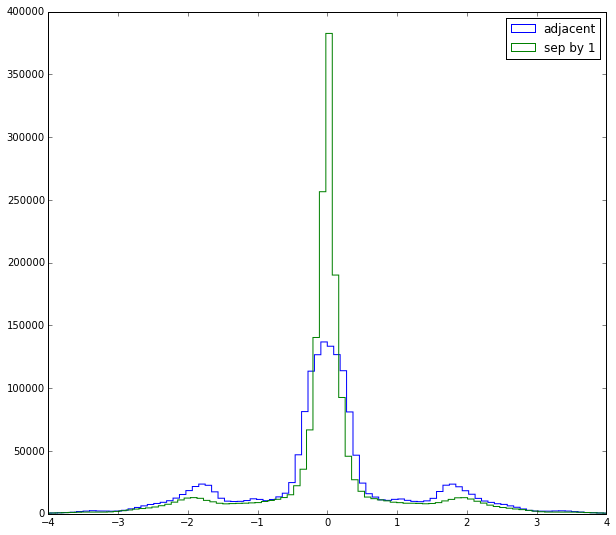

In [13]:
plt.figure(figsize = (10,9))
plt.hist(info1_1, histtype = 'step', bins = 150, label = 'adjacent')
plt.hist(info1_2, histtype = 'step', bins = 150, label = 'sep by 1')
plt.axis([-4,4,0,400000])
plt.legend()
plt.savefig('Z>0.1.png')
plt.show

In [10]:
info5_1, info5_2 = find_redshift_diffs('mjd5.dat')

<function matplotlib.pyplot.show>

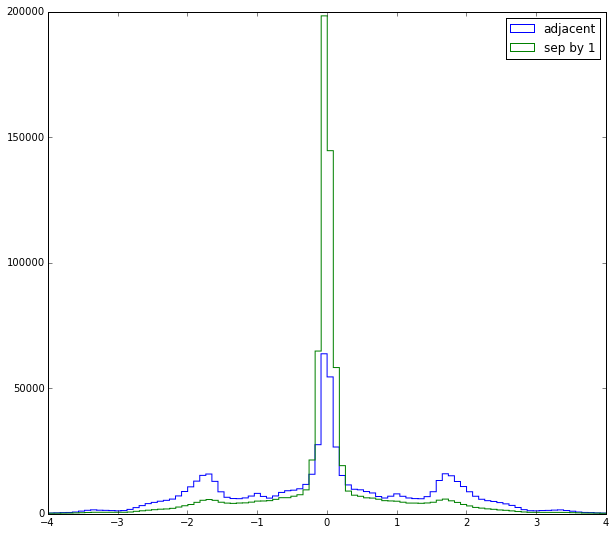

In [12]:
plt.figure(figsize = (10,9))
plt.hist(info5_1, histtype = 'step', bins = 150, label = 'adjacent')
plt.hist(info5_2, histtype = 'step', bins = 150, label = 'sep by 1')
plt.axis([-4,4,0,200000])
plt.legend()
plt.savefig('Z>0.5.png')
plt.show